In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# AA County COVID-19 Cases By Zip Code (2020-04-11)

In [2]:
aa_county_zips = ['20701', '20711', '20714', '20724', '20733', '20736', '20751', 
                   '20754', '20755', '20758', '20764', '20765', '20776', '20778', 
                   '20779', '21012', '21032', '21035', '21037', '21054', '21060', 
                   '21061', '21062', '21076', '21077', '21090', '21108', '21113', 
                   '21114', '21122', '21140', '21144', '21146', '21225', '21226', 
                   '21240', '21401', '21402', '21403', '21405', '21409', '21411', 
                   '21412']


cases = pd.DataFrame([0 for _ in range(len(aa_county_zips))],
                                index=aa_county_zips, columns=['cases'])

zips_json = requests.get('https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/TEST_ZIPCodeCases/FeatureServer/0/query?f=json&where=ProtectedCount%3E%3D8&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=ProtectedCount%20desc&outSR=102100&resultOffset=0&resultRecordCount=300&cacheHint=true')

current_cases_d = dict((x['attributes']['ZIPCODE1'],x['attributes']['ProtectedCount'])
                        for x in zips_json.json()['features'])

current_cases = pd.DataFrame(
    current_cases_d.values(),
    index=current_cases_d.keys(),
    columns=['cases'])
current_cases

aa_co_filter = current_cases[current_cases.index.isin(aa_county_zips)]
cases.update(aa_co_filter)
cases['ZIPCODE'] = cases.index
cases

,cases,ZIPCODE
20701,0.0,20701
20711,9.0,20711
20714,8.0,20714
20724,39.0,20724
20733,0.0,20733
20736,9.0,20736
20751,0.0,20751
20754,9.0,20754
20755,0.0,20755
20758,0.0,20758


Loading 2010 census data by zip code.  Data is broken down by age range and gender.  Summary rows have no gender.

population,minimum_age,maximum_age,gender,zipcode,geo_id

In [3]:
pop = pd.read_csv('population_by_zip_2010.csv',dtype={'zipcode': str})
pop['ZIPCODE'] = pop['zipcode']
pop.set_index('ZIPCODE')
pop = pop[(pop['gender'] != 'male') & (pop['gender'] != 'female')]

Merge case data for Anne Arundel county with population

In [4]:
pop = pop.merge(cases,on='ZIPCODE').sort_values('ZIPCODE')
pop

,population,minimum_age,maximum_age,gender,zipcode,geo_id,ZIPCODE,cases
35,2,NaN,NaN,NaN,20701,8600000US20701,20701,0.0
19,6643,NaN,NaN,NaN,20711,8600000US20711,20711,9.0
20,4345,NaN,NaN,NaN,20714,8600000US20714,20714,8.0
27,16093,NaN,NaN,NaN,20724,8600000US20724,20724,39.0
15,2672,NaN,NaN,NaN,20733,8600000US20733,20733,0.0
9,8904,NaN,NaN,NaN,20736,8600000US20736,20736,9.0
17,2343,NaN,NaN,NaN,20751,8600000US20751,20751,0.0
37,6951,NaN,NaN,NaN,20754,8600000US20754,20754,9.0
6,9302,NaN,NaN,NaN,20755,8600000US20755,20755,0.0
39,721,NaN,NaN,NaN,20758,8600000US20758,20758,0.0


Read zip codes geo file and merge with population data

In [5]:
zips = gpd.read_file('cb_2018_us_zcta510_500k.shp')
zips['ZIPCODE'] = zips['ZCTA5CE10']
zips.set_index('ZIPCODE')
zips = zips.merge(pop,on='ZIPCODE',how='inner')

# Cases per 1,000

In [6]:
zips['density'] = zips['cases'] / (zips['population'] / 1_000)
zips['density'] = zips['density'].replace(np.nan,0)
zips.set_index('ZIPCODE')
print(zips[['ZIPCODE','density','cases','population']].sort_values('density'))

   ZIPCODE   density  cases  population
0    20779  0.000000    0.0        1182
34   21035  0.000000    0.0        7815
32   21226  0.000000    0.0        7561
31   21402  0.000000    0.0        5217
25   20764  0.000000    0.0        4176
24   20758  0.000000    0.0         721
23   20755  0.000000    0.0        9302
21   20733  0.000000    0.0        2672
12   20776  0.000000    0.0        3289
39   20751  0.000000    0.0        2343
5    21405  0.000000    0.0         544
8    21140  0.000000    0.0        3457
1    21240  0.000000    0.0           0
2    21077  0.000000    0.0         224
4    20701  0.000000    0.0           2
6    20765  0.000000    0.0         514
7    20778  0.000000    0.0        2009
36   21113  0.787686   24.0       30469
11   21409  0.797448   16.0       20064
9    21403  0.958076   29.0       30269
22   21061  1.005886   54.0       53684
10   21122  1.006999   61.0       60576
13   20736  1.010782    9.0        8904
26   21144  1.035002   33.0       31884


/home/mckeowbc/.local/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/home/mckeowbc/.local/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)
/home/mckeowbc/.local/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


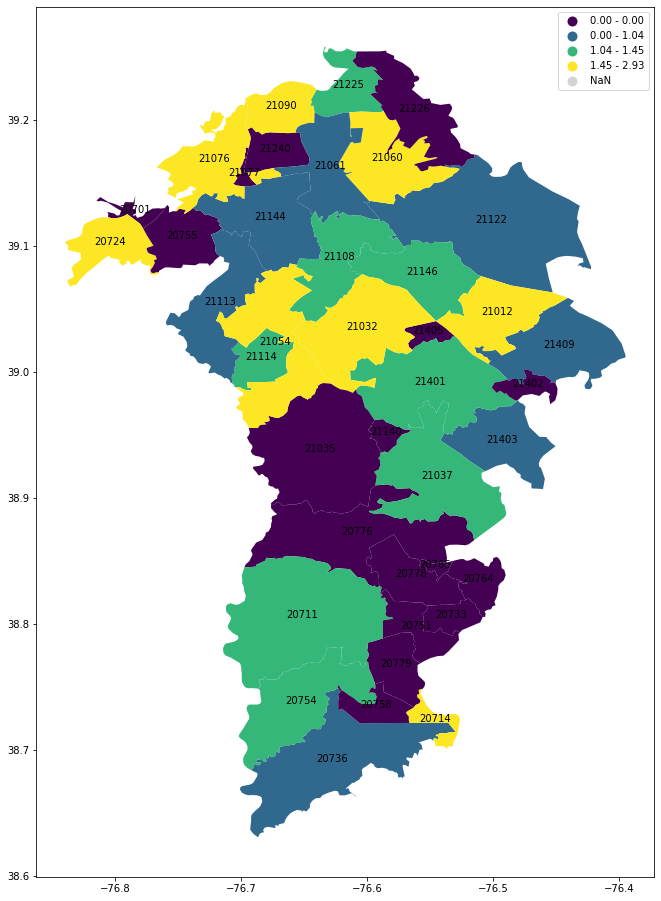

In [12]:
zplot = zips.plot(column='density',figsize=(16,16),legend=True,
                  scheme='quantiles',
                 missing_kwds={"color": "lightgrey"})
_ = zips.apply(lambda x: zplot.annotate(s=x.ZCTA5CE10, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
plt.savefig('AACo.png')